# Splitting data into training and testing

 Total: 1306122

In [ ]:
import pandas as pd

filepath_train = '../data/train.csv'
df_train = pd.read_csv(filepath_train,index_col=0)
print('training dataset size: ',df_train.shape)

# Save new split training and testing data

In [ ]:
df_train['qid_base_hex'] = df_train.index
df_train['qid_base_ten'] = df_train['qid_base_hex'].apply(lambda x : int(x, 16))

msk = np.random.rand(len(df_train)) < 0.8

train = df_train[msk][['question_text','target']]
test = df_train[~msk][['question_text','target']]

train.to_csv('../data/mytrain.csv')
test.to_csv('../data/mytest.csv')

# Read from train and test data and visualize them

In [14]:
df_train = pd.read_csv('../data/mytrain.csv')
df_test = pd.read_csv('../data/mytest.csv')

In [16]:
df_train['train_test'] = 'train'
df_test['train_test'] = 'test'
df = pd.concat([df_train, df_test])
df['qid_base_ten'] = df['qid'].apply(lambda x : int(x, 16))


min_qid = df['qid_base_ten'].min()
df['qid_base_ten_normalized'] = df['qid_base_ten'].apply(lambda x : (x - min_qid)/min_qid)

<Figure size 432x288 with 0 Axes>

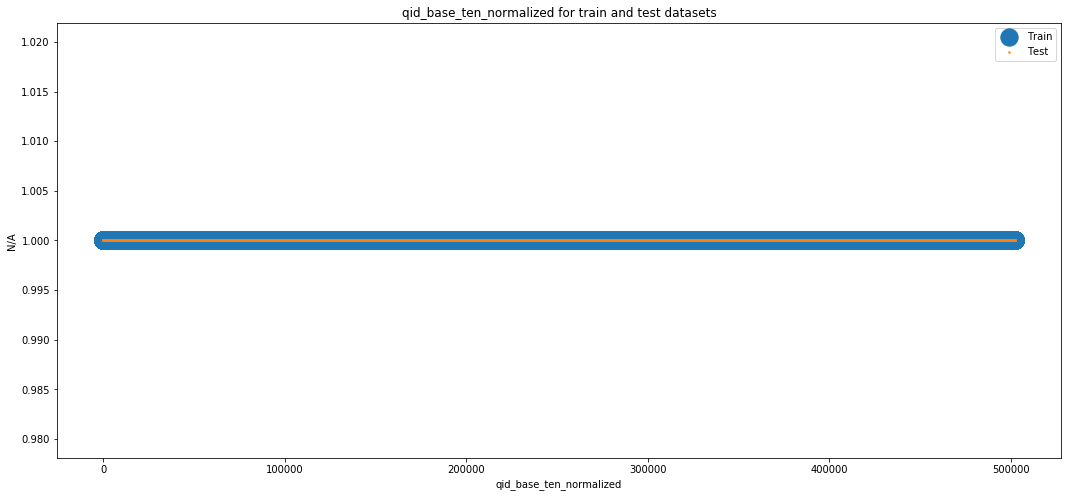

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.clf()
plt.figure(figsize=(18, 8));
plt.scatter(x=df[df['train_test']=='train']['qid_base_ten_normalized'], y=[1]*df[df['train_test']=='train'].shape[0], label='Train', s=300);
plt.scatter(x=df[df['train_test']=='test']['qid_base_ten_normalized'], y=[1]*df[df['train_test']=='test'].shape[0], label='Test',s=2);
plt.xlabel('qid_base_ten_normalized');
plt.ylabel('N/A');
plt.title('qid_base_ten_normalized for train and test datasets')
plt.legend()
plt.show()

# Finally the reading of training and testing data would be:

In [19]:
import pandas as pd
df_train = pd.read_csv('../data/mytrain.csv')
df_test = pd.read_csv('../data/mytest.csv')
# or read qid as index:
# df_train = pd.read_csv('../../data/mytrain.csv',index_col=0)
# df_test = pd.read_csv('../../data/mytest.csv',index_col=0)

# Stats over corpus

In [21]:
sentences = df_train['question_text'].values
sen_len = [len(line.split()) for line in sentences]

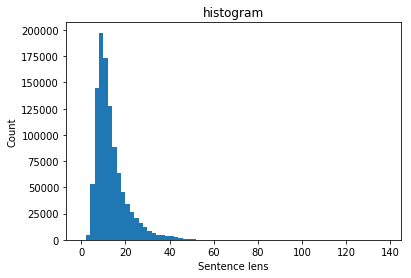

In [27]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt



plt.hist(sen_len, bins =  np.arange(0,140,2)) 
plt.title("histogram") 
plt.xlabel('Sentence lens')
plt.ylabel('Count')
plt.show()